<a href="https://colab.research.google.com/github/ChnssA/advance-algorithms-lab/blob/main/advance_ALGORITHM_lab8_25010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Sheet 8**




```
Lab Sheet 8
1.	Submit the following leetcode questions:
(i)	1143 Longest Common Subsequence
(ii)	2742 Painting the walls
(iii)	300 Longest Increasing subsequence
(iv)	53 Maximum subaraay


```



In [ ]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        if len(text1) < len(text2):
            text1, text2 = text2, text1
        m, n = len(text1), len(text2)
        prev = [0] * (n + 1)
        for i in range(1, m + 1):
            curr = [0] * (n + 1)
            for j in range(1, n + 1):
                if text1[i - 1] == text2[j - 1]:
                    curr[j] = 1 + prev[j - 1]
                else:
                    curr[j] = max(prev[j], curr[j - 1])
            prev = curr
        return prev[n]



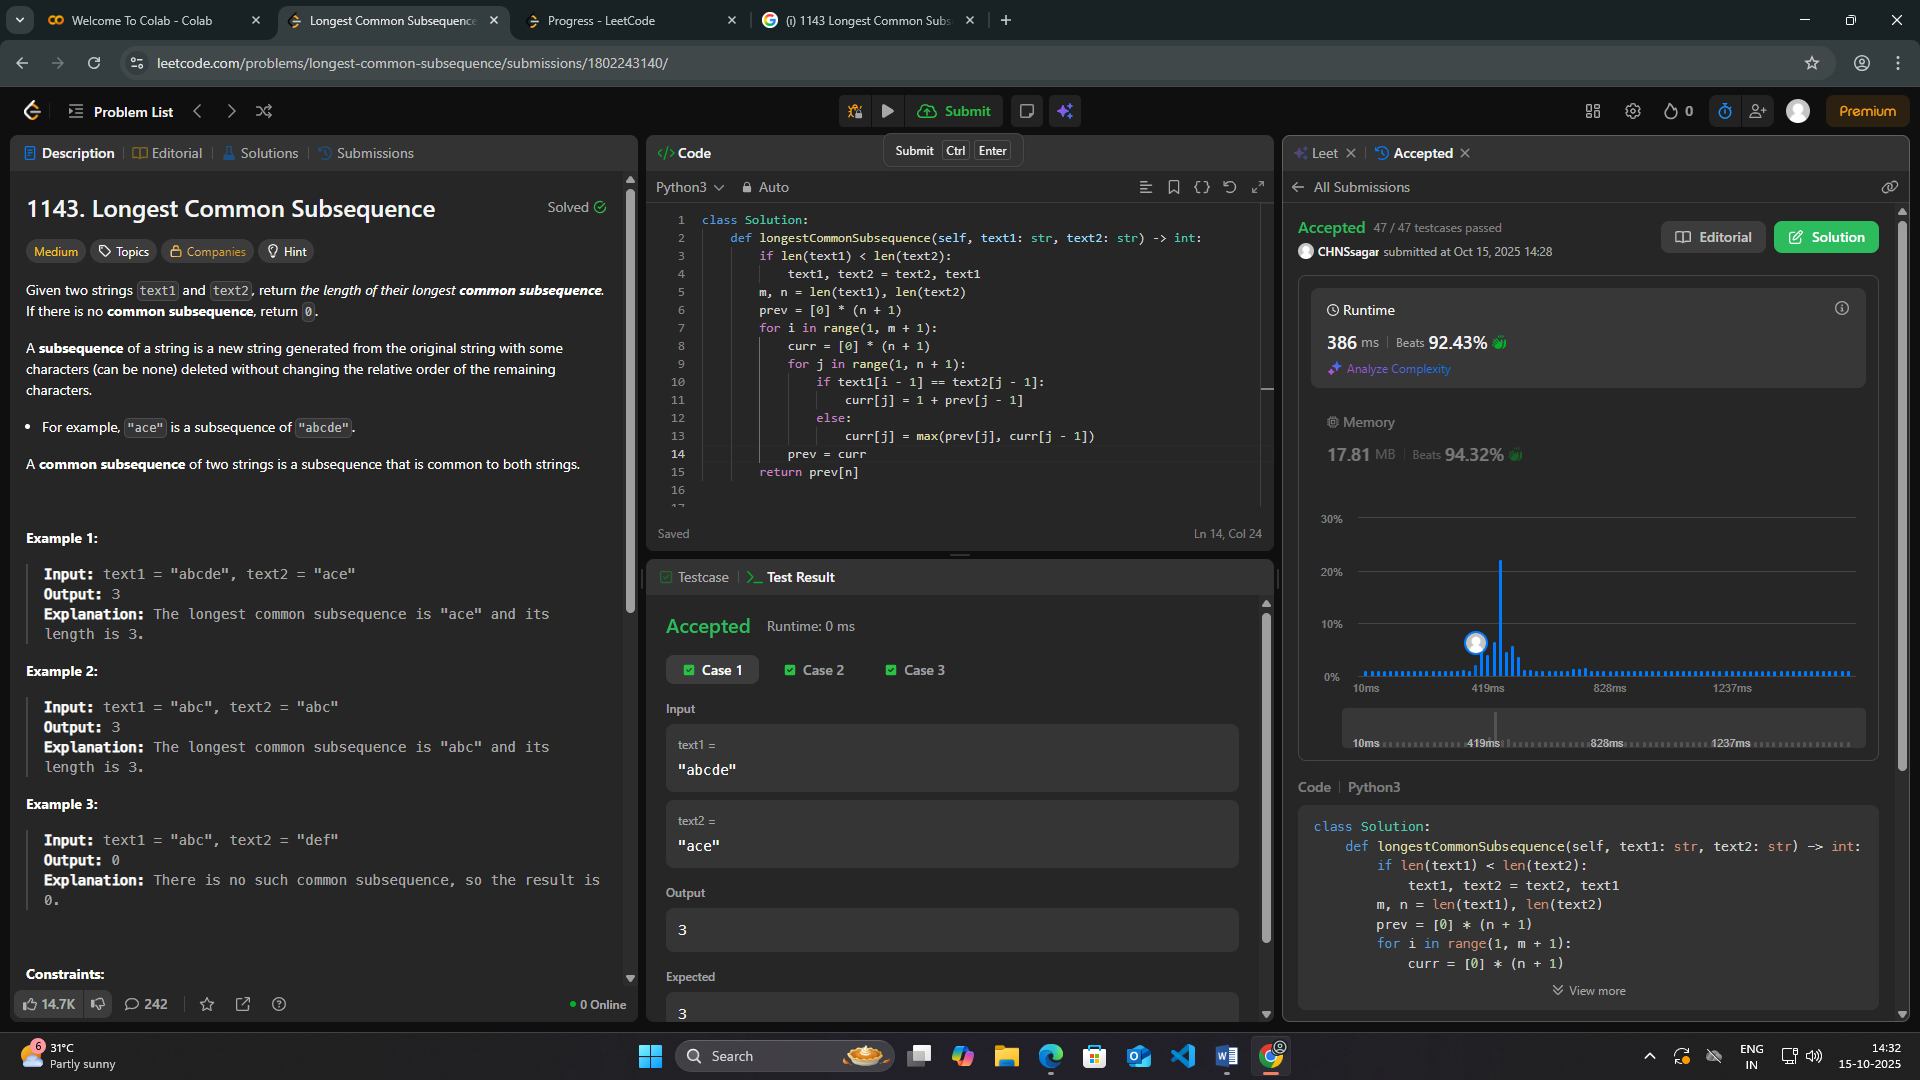

In [ ]:
class Solution:
    def paintWalls(self, cost: List[int], time: List[int]) -> int:
        n = len(cost)
        # dp[j] = minimum cost to paint at least `j` walls.
        # Initialize dp with a large value and dp[0] to 0.
        # The maximum possible cost can be estimated to be n * max(cost)
        # but a sufficiently large value like infinity works just fine.
        infinity = float('inf')
        dp = [infinity] * (n + 1)
        dp[0] = 0

        # Iterate through each wall and its corresponding cost and time.
        for i in range(n):
            c = cost[i]
            t = time[i]

            # Iterate backwards through the number of walls.
            # This is crucial for 1D DP space optimization to avoid
            # using values from the current iteration.
            for j in range(n, 0, -1):
                # Using the paid painter for wall `i` paints one wall and
                # frees up the free painter for 't' walls.
                # The total number of walls painted is 1 (paid) + t (free).
                # We need to paint at least 'j' walls.
                # The minimum number of walls that needed to be painted before this
                # step for the free painter to cover the rest is j - (t + 1).
                # If j - (t + 1) is negative, it means the current paid painter
                # alone is enough to cover all remaining walls, so we need
                # to have painted 0 walls before this step.
                prev_walls = max(0, j - t - 1)

                # Update the minimum cost to paint at least 'j' walls.
                # We compare the existing cost `dp[j]` with the new cost
                # of painting wall `i` with the paid painter.
                dp[j] = min(dp[j], dp[prev_walls] + c)

        return dp[n]


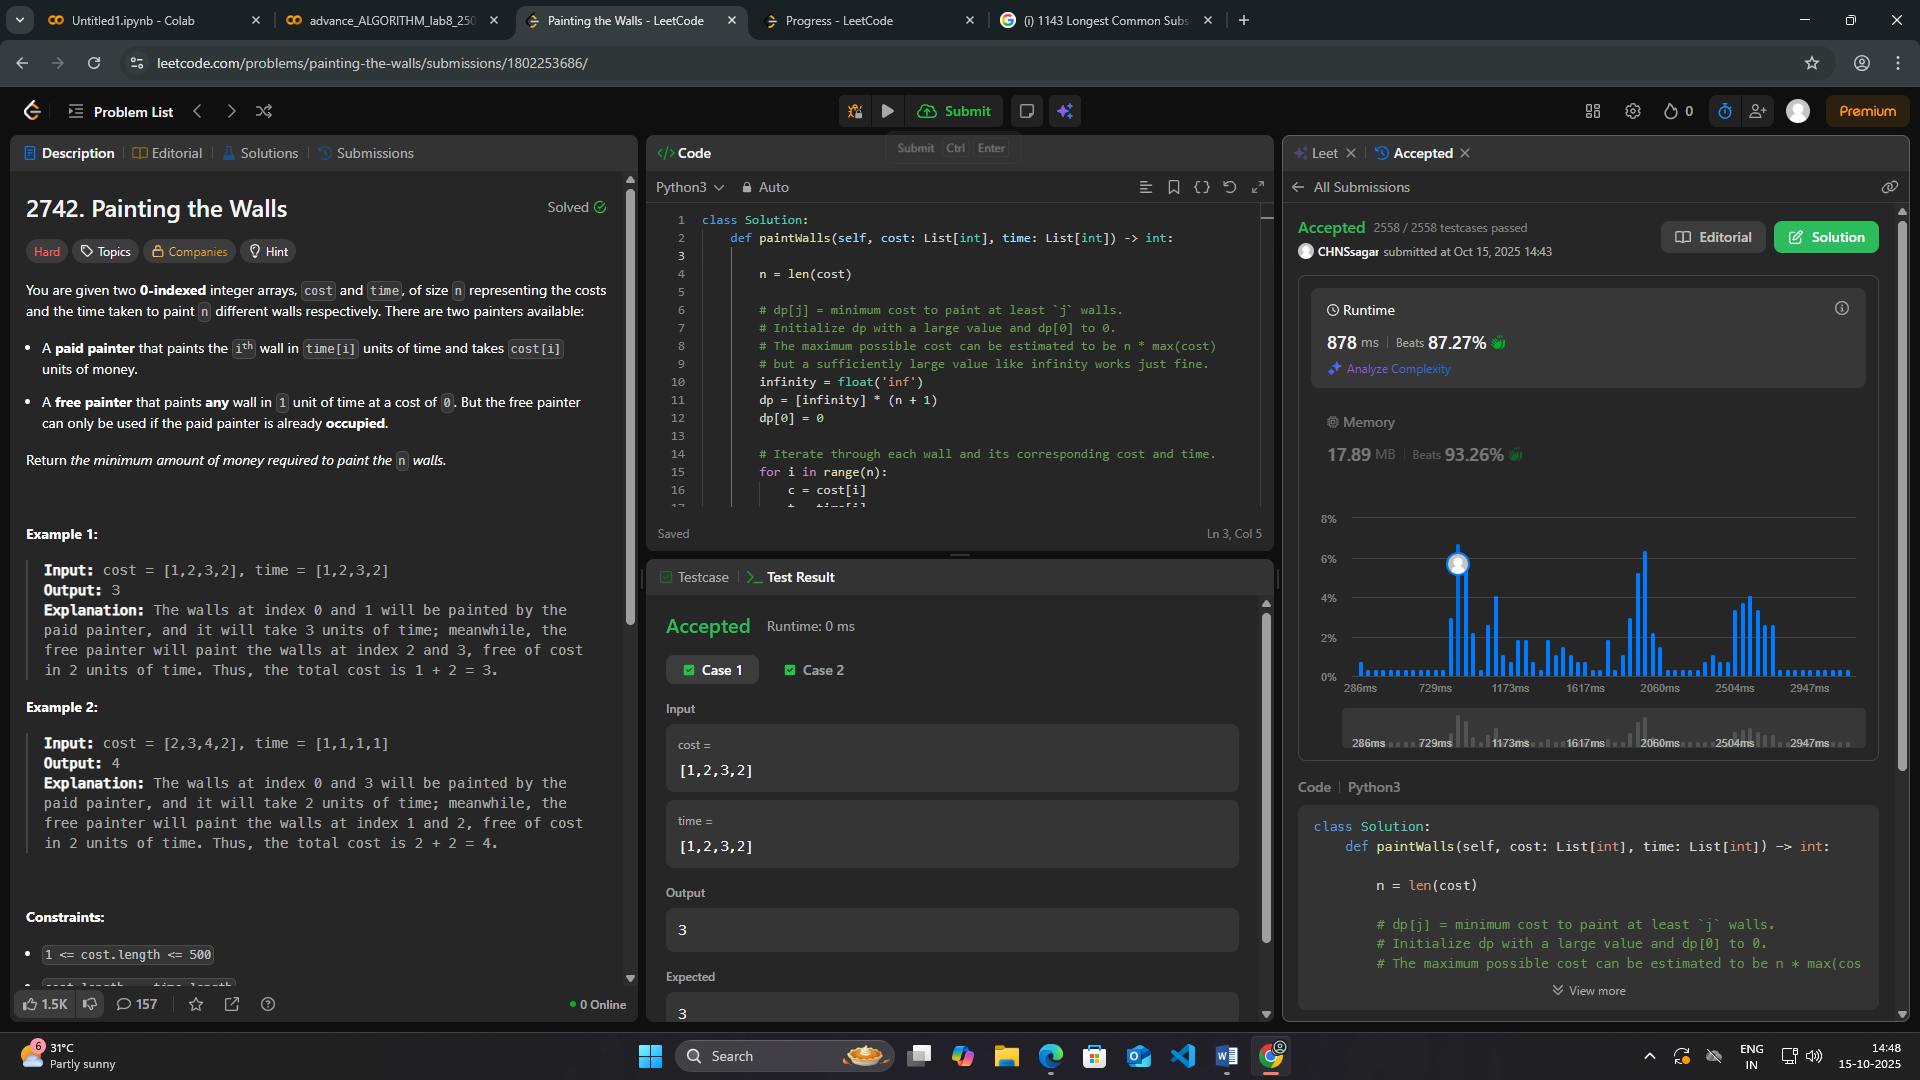

In [ ]:
import bisect
from typing import List

class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        tails = []
        for num in nums:
            # Find the index `i` of the first element in `tails` that is >= `num`.
            i = bisect.bisect_left(tails, num)

            # If `num` is larger than all elements in `tails`,
            # extend the longest subsequence.
            if i == len(tails):
                tails.append(num)
            # Otherwise, replace the smallest tail of a subsequence of length `i+1`
            # with `num` to get a better candidate.
            else:
                tails[i] = num

        return len(tails)


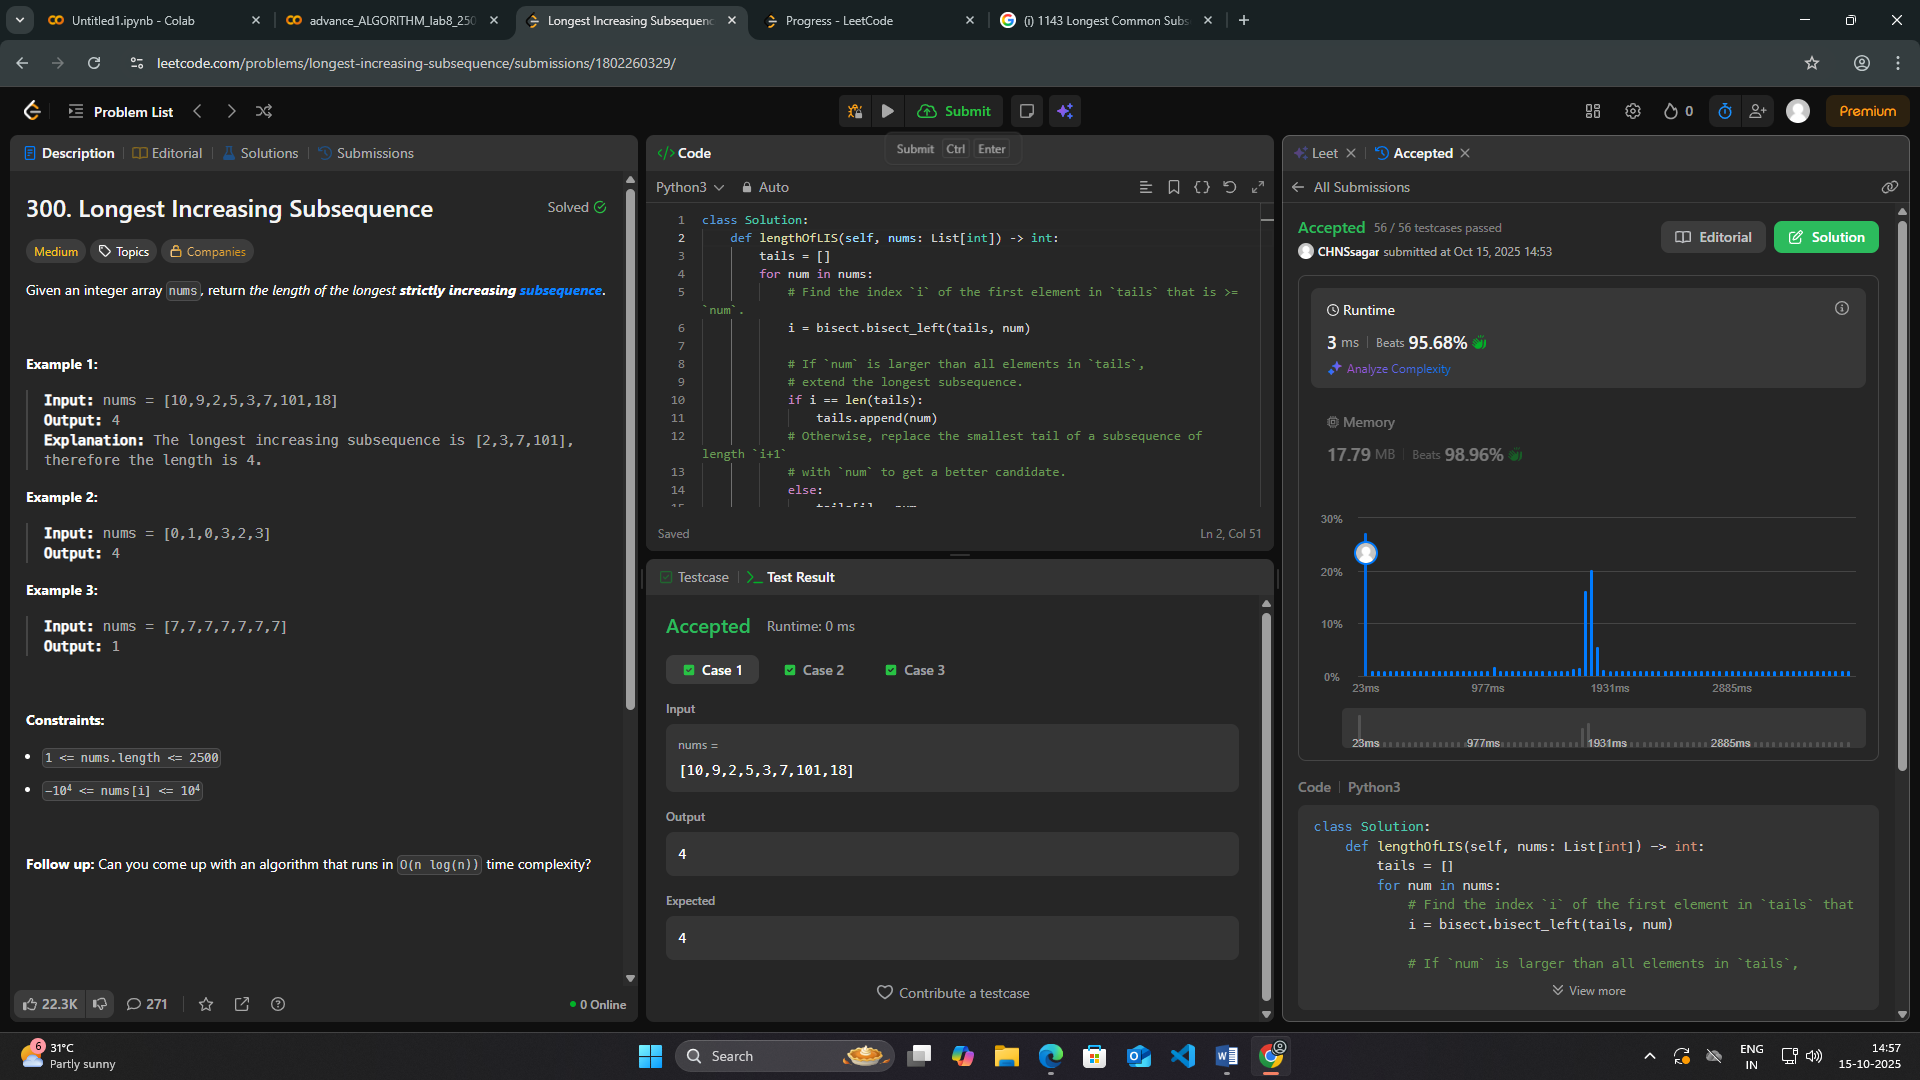

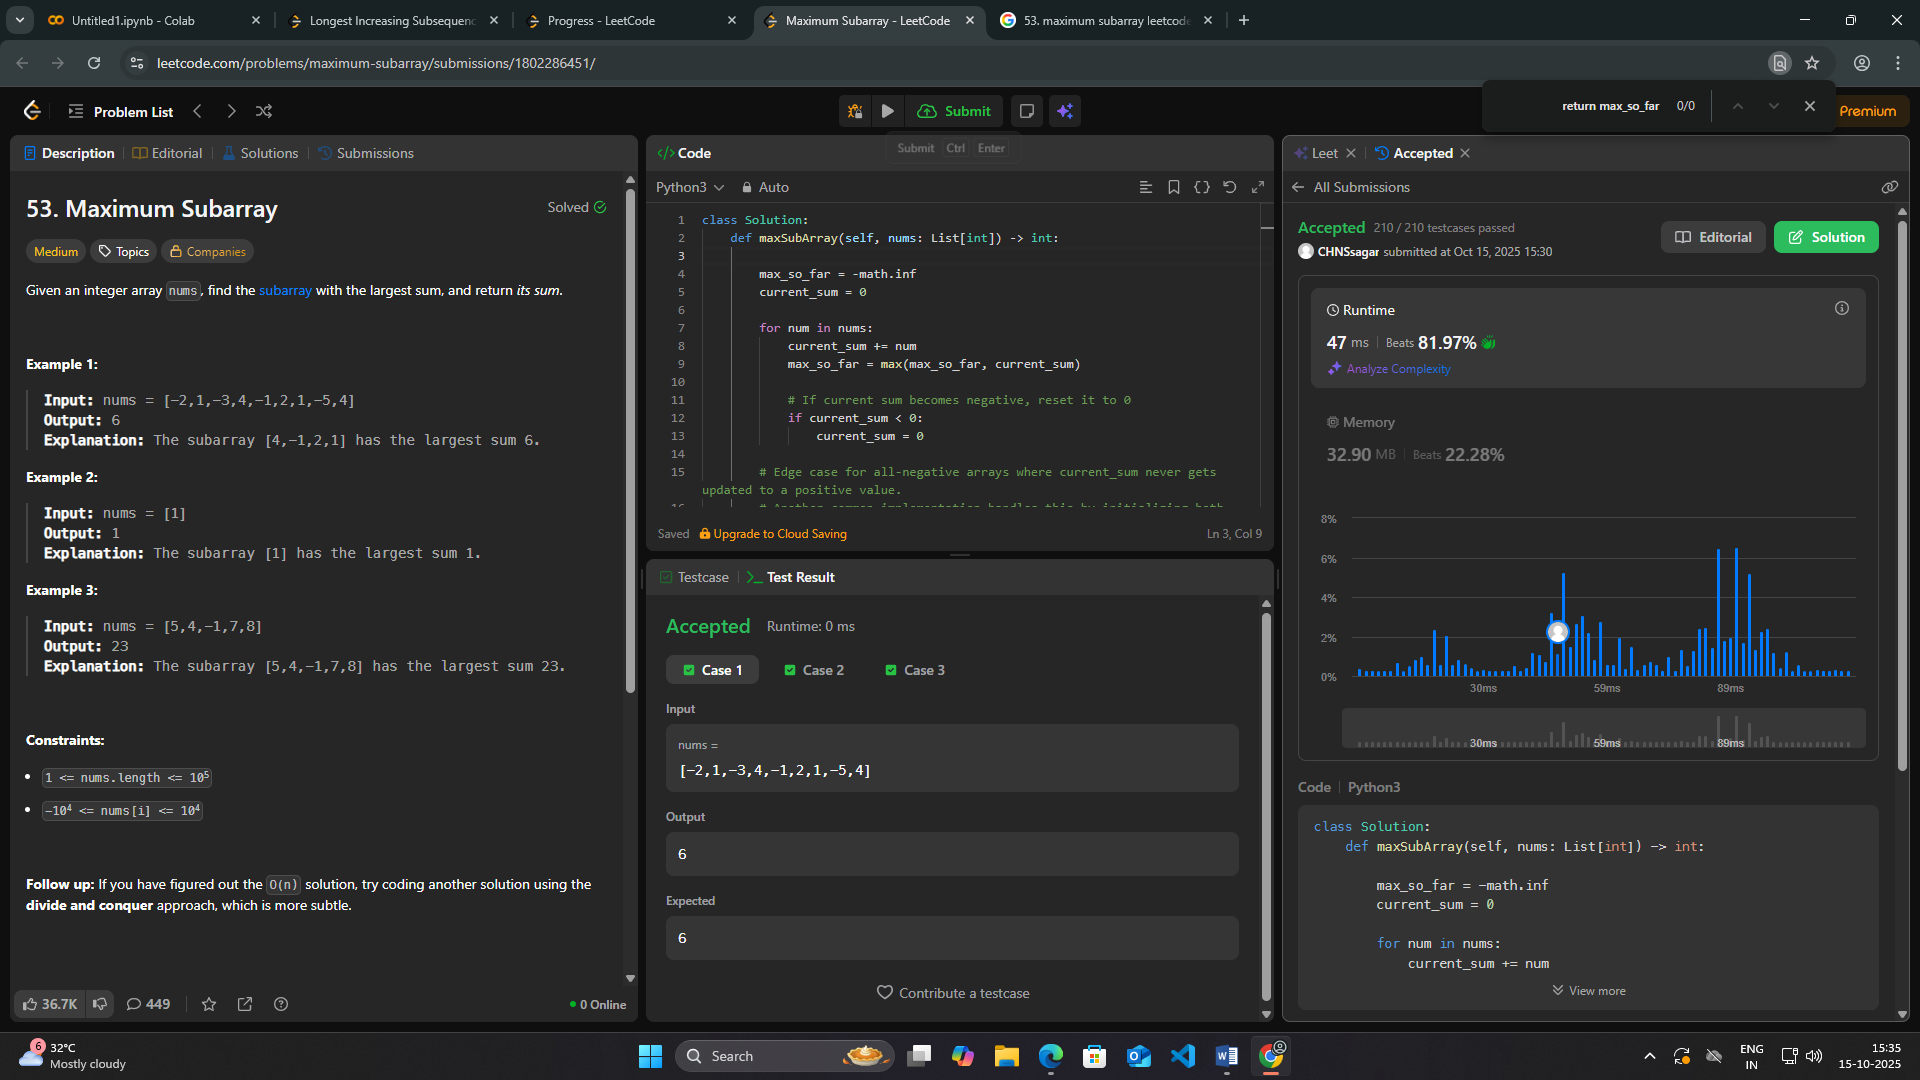

In [2]:
import math

class Solution:
    def maxSubArray(self, nums: list[int]) -> int:
        max_so_far = -math.inf
        current_sum = 0

        for num in nums:
            current_sum += num
            max_so_far = max(max_so_far, current_sum)

            # If current sum becomes negative, reset it to 0
            if current_sum < 0:
                current_sum = 0

        # Edge case for all-negative arrays where current_sum never gets updated to a positive value.
        # Another common implementation handles this by initializing both `current_sum` and `max_so_far`
        # to the first element and starting the loop from the second element.
        if max_so_far == 0 and any(n < 0 for n in nums):
            return max(nums)

        return int(max_so_far)
